<a href="https://colab.research.google.com/github/udayabhargavi/World_Happiness_Report21B/blob/main/happiness_report_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] =15
plt.rcParams['figure.figsize'] =(10,7)
plt.rcParams['figure.facecolor'] ='#FFE5B4'

In [28]:
data=pd.read_csv('/content/world-happiness-report-2021.csv')

In [29]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [31]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [32]:
data=data[data_columns].copy()

In [33]:
happy_df = data.rename({'Country name': 'country_name', 'Regional indicator': 'regional_indicator','Ladder score':'ladder_score','Logged GDP per capita':'logged_gdp_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'}, axis=1)

In [34]:
happy_df.head()

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [35]:
happy_df.isnull().sum()

,0
country_name,0
regional_indicator,0
ladder_score,0
logged_gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_choices,0
generosity,0
perceptions_of_corruption,0


Text(0, 0.5, 'GDP per capita')

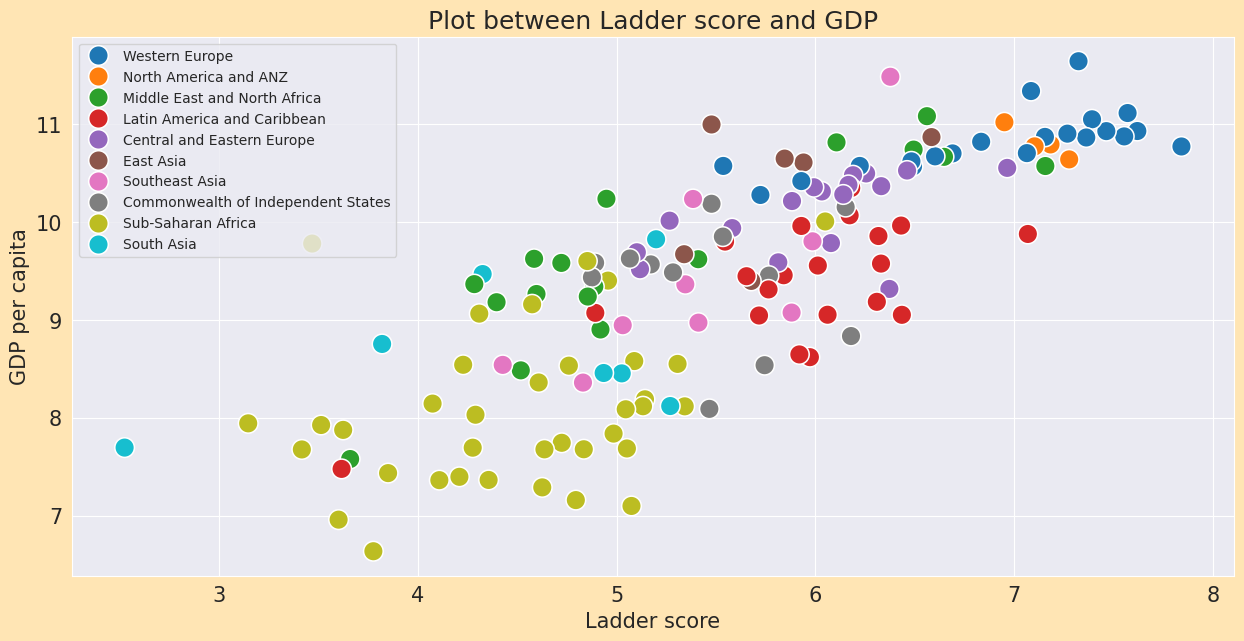

In [39]:
#PLOT BETWEEN HAPPINESS AND GDP
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Ladder score and GDP')
sns.scatterplot(x= happy_df.ladder_score, y = happy_df.logged_gdp_per_capita, hue = happy_df.regional_indicator, s=200);
plt.legend(loc = 'upper left', fontsize ='10')
plt.xlabel('Ladder score')
plt.ylabel('GDP per capita')

In [40]:
gdp_region = happy_df.groupby('regional_indicator')['logged_gdp_per_capita'].sum()
gdp_region

,logged_gdp_per_capita
regional_indicator,
Central and Eastern Europe,171.854
Commonwealth of Independent States,112.822
East Asia,62.206
Latin America and Caribbean,187.400
Middle East and North Africa,164.324
North America and ANZ,43.238
South Asia,60.778
Southeast Asia,84.793
Sub-Saharan Africa,290.707


Text(0, 0.5, '')

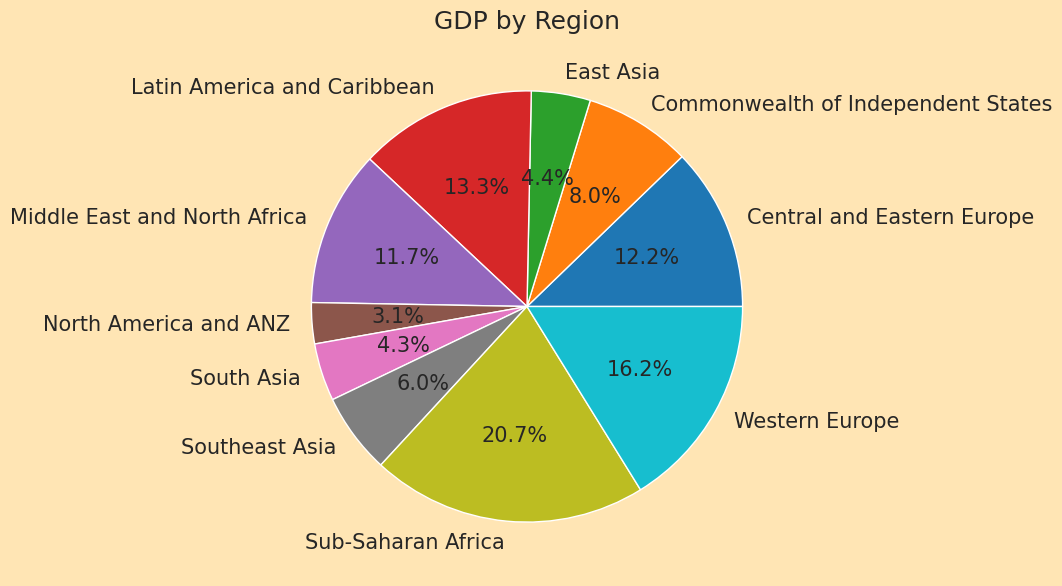

In [41]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [43]:
#total countries
total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


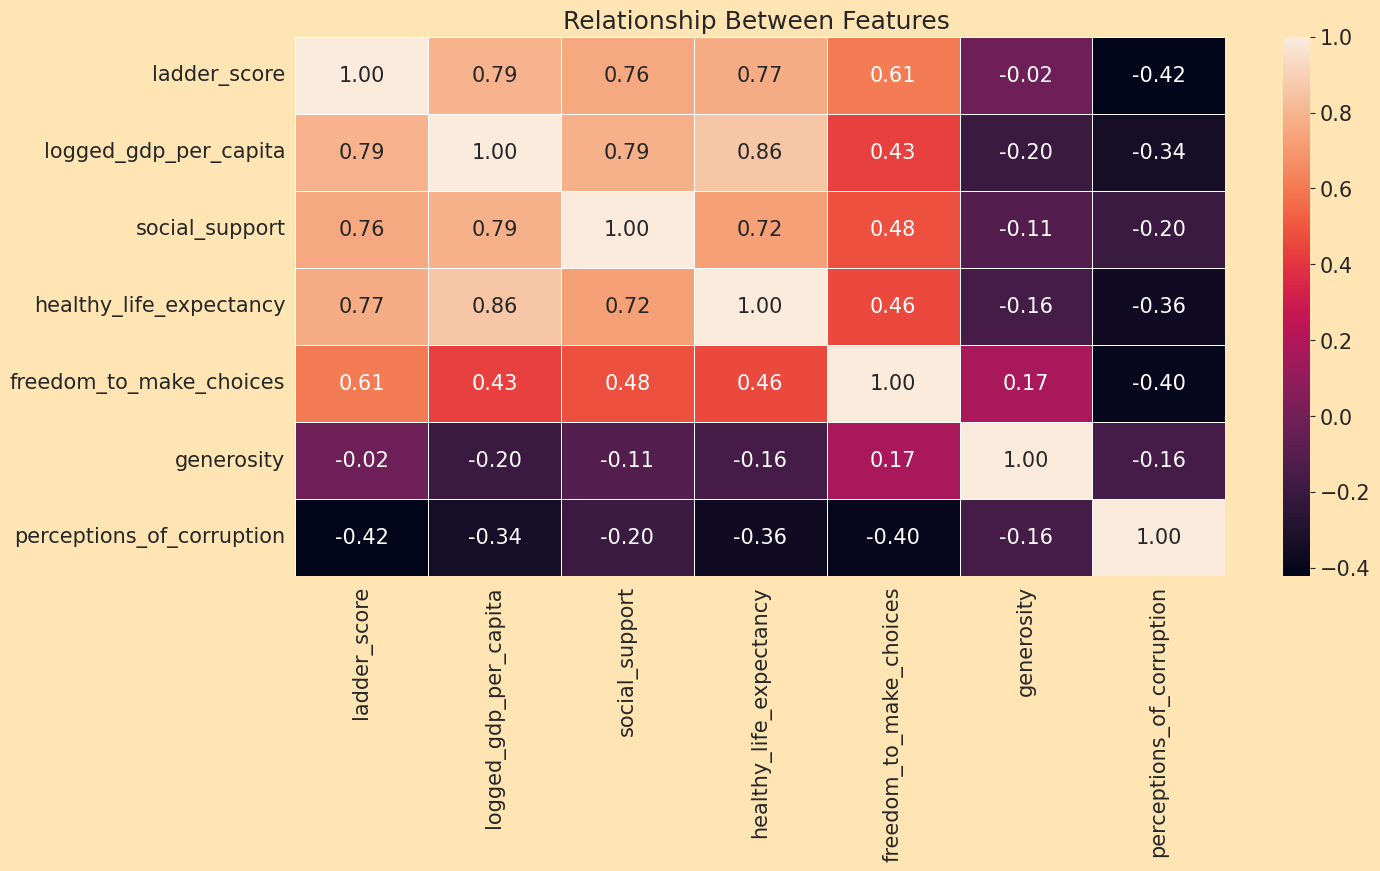

In [51]:
#correlation map


sns.heatmap(happy_df.select_dtypes(include='number').corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

In [52]:
#corruption in regions

corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

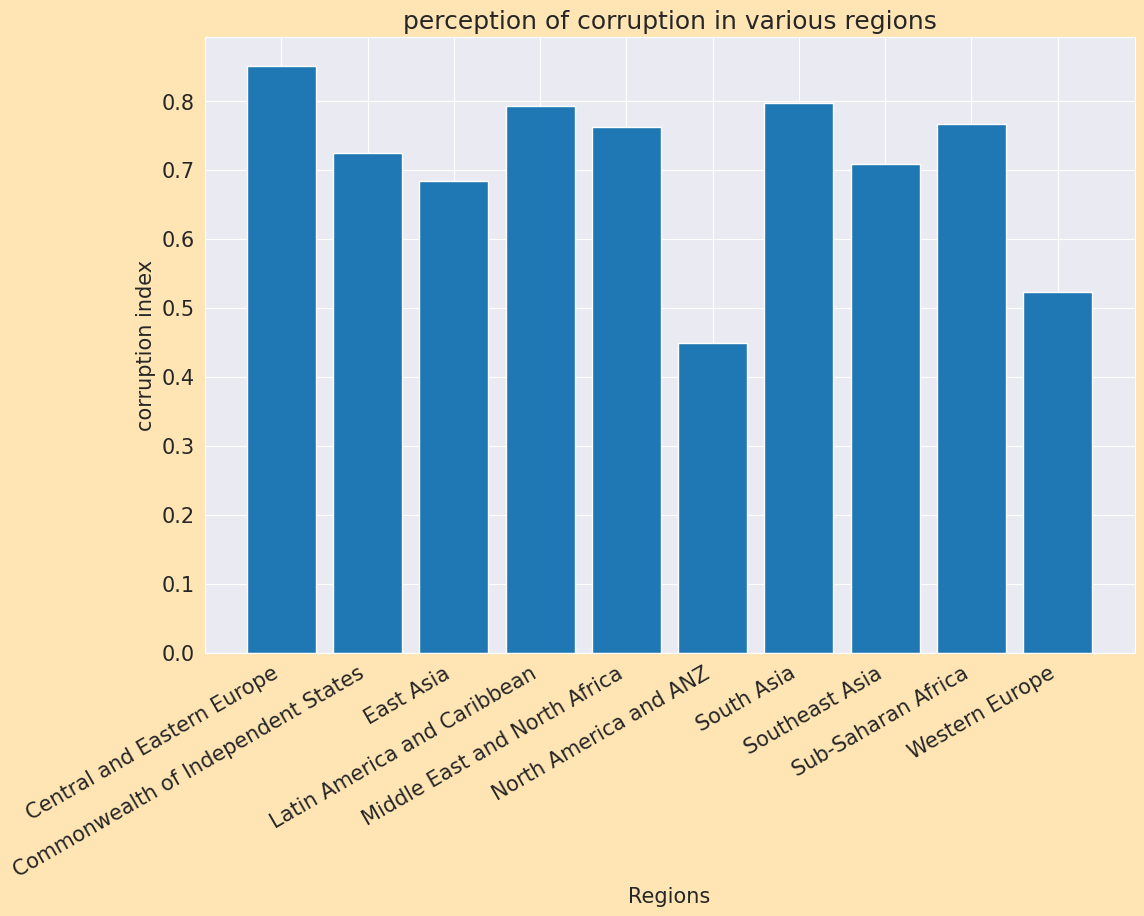

In [53]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('perception of corruption in various regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('corruption index', fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)

In [54]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

<ipython-input-56-259834f58103>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
<ipython-input-56-259834f58103>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


Text(827.8358585858584, 0.5, 'Life expectancy')

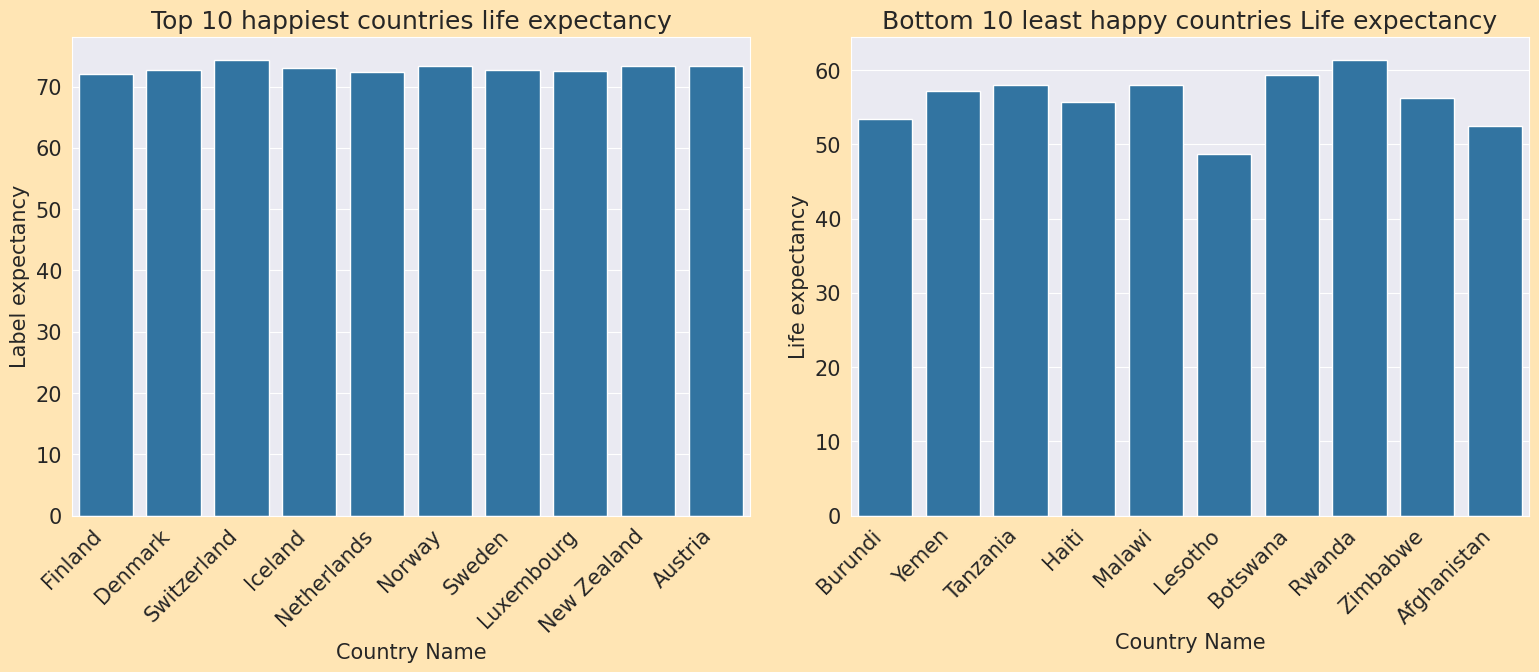

In [56]:
fig, axes=plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels= top_10.country_name
axes[0].set_title('Top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country_name, y=top_10.healthy_life_expectancy,ax= axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Label expectancy')

xlabels=bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country_name, y=bottom_10.healthy_life_expectancy,ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy')

Text(0, 0.5, 'Ladder score')

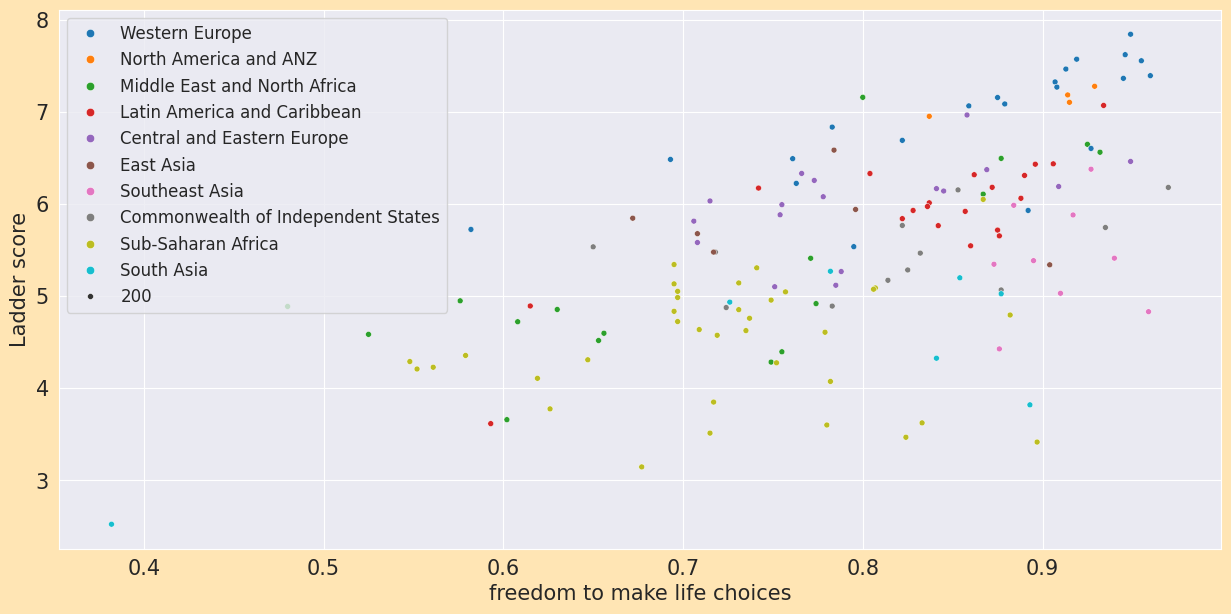

In [58]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom_to_make_choices, y=happy_df.ladder_score, hue= happy_df.regional_indicator, size=200)
plt.legend(loc='upper left', fontsize='12')
plt.xlabel('freedom to make life choices')
plt.ylabel('Ladder score')

<BarContainer object of 10 artists>

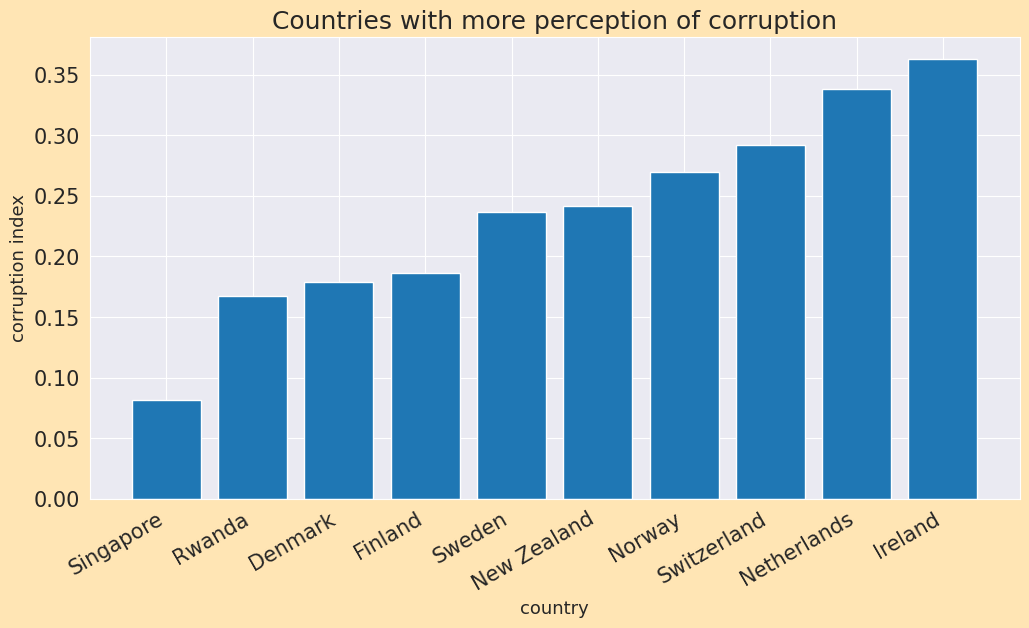

In [60]:
country = happy_df.sort_values(by='perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with more perception of corruption')
plt.xlabel('country',fontsize=13)
plt.ylabel('corruption index',fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country.country_name,country.perceptions_of_corruption)

<BarContainer object of 10 artists>

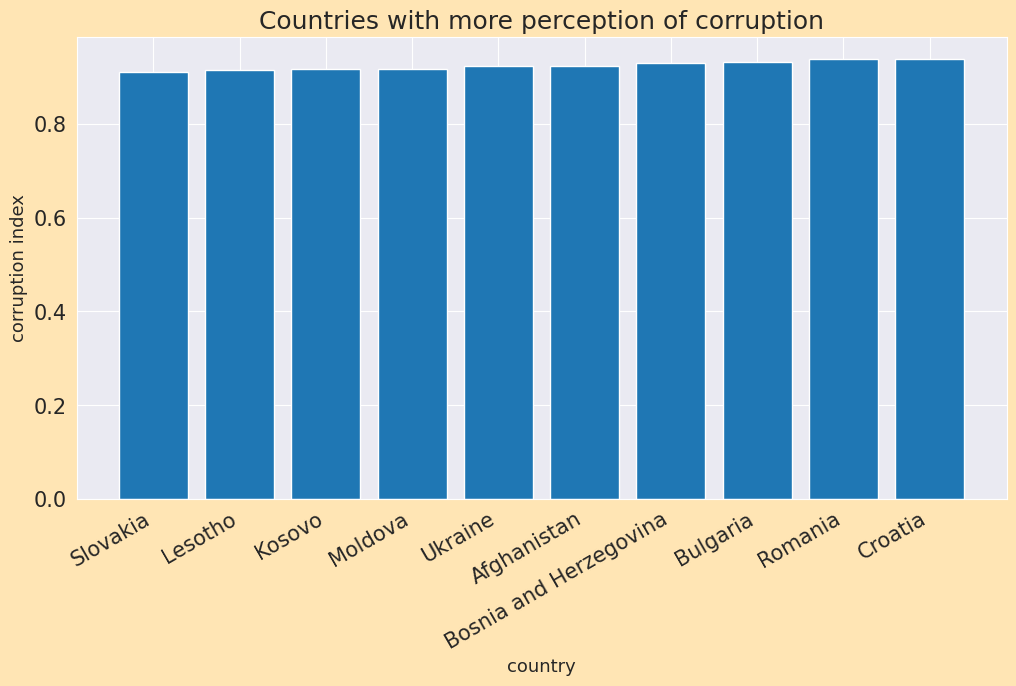

In [61]:
#for bottom most perceptions of corruption

country = happy_df.sort_values(by='perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with more perception of corruption')
plt.xlabel('country',fontsize=13)
plt.ylabel('corruption index',fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country.country_name,country.perceptions_of_corruption)

Text(0, 0.5, 'Corruption')

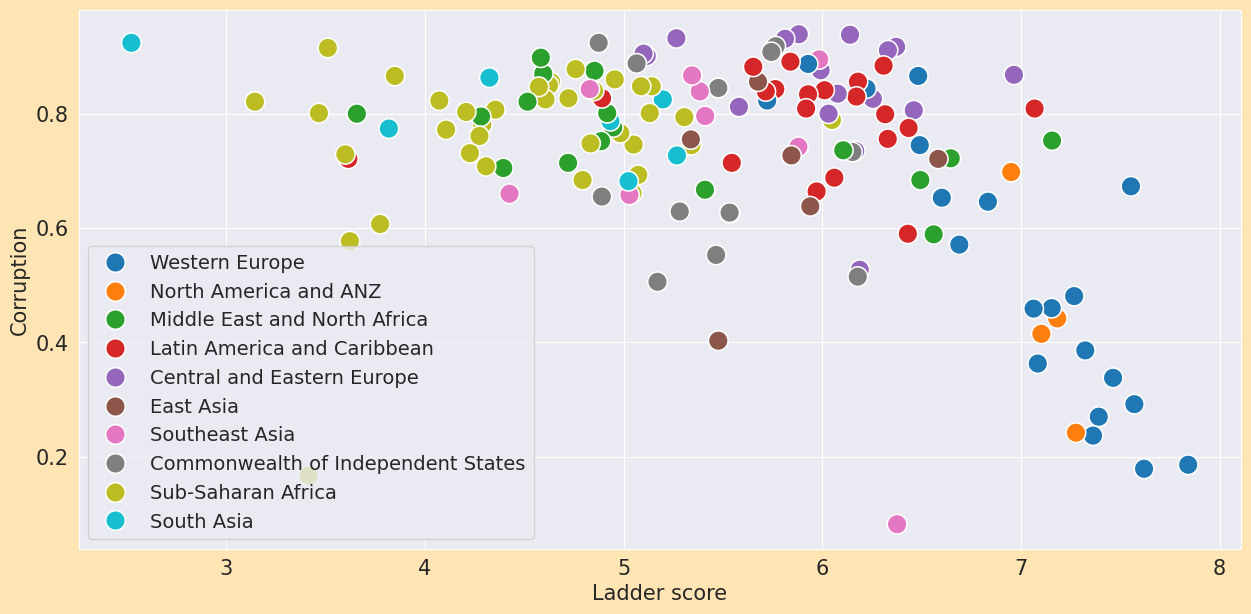

In [62]:
#scatter plot on how happiness score varies on corruption i.e corruption vs ladder score

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.ladder_score, y=happy_df.perceptions_of_corruption, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='lower left', fontsize='14')
plt.xlabel('Ladder score')
plt.ylabel('Corruption')